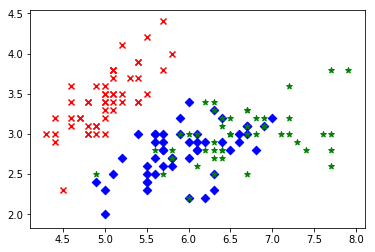

In [15]:
# 为了方便绘图，只使用前两组特征
import math
import matplotlib.pyplot as plt               
from sklearn.datasets import load_iris
import numpy as np
from matplotlib.colors import ListedColormap
import heapq
from collections import Counter
data=load_iris()
x=data.data
x=x[:,0:2]
y=data.target
red_x,red_y=[],[]
blue_x,blue_y=[],[]
green_x,green_y=[],[]
for i in range(len(x)):
    if y[i] ==0:
        red_x.append(x[i][0])
        red_y.append(x[i][1])

    elif y[i]==1:
        blue_x.append(x[i][0])
        blue_y.append(x[i][1])

    else:
        green_x.append(x[i][0])
        green_y.append(x[i][1])
#可视化
plt.scatter(red_x,red_y,c='r',marker='x')
plt.scatter(blue_x,blue_y,c='b',marker='D')
plt.scatter(green_x,green_y,c='g',marker='*')
# plt.scatter(x[:,0],x[:,1],c=y,marker='h') [6,2.2]
plt.show()

In [16]:
input_data=x.T
train_data=x.T
train_label=y.T.reshape(1,len(y.T))
print(input_data.shape,train_label.shape)

(2, 150) (1, 150)


In [17]:
def knn_pred(input_data,train_data,train_label,k):
    """
    target:利用KNN预测分类
    参数：
        input_data: 希望预测的数据  2，150
        train_data: 当前训练集  2，150
        train_lable： 训练集的类别     1，150
    return：
        preds：对input_data 预测的分类
    """

    n1=input_data.shape[1]
    n2=train_data.shape[1]
    input_data=input_data.reshape(2,-1)
    preds=np.zeros((1,n1))
    for i in range(n1):
        distance=np.linalg.norm(train_data-input_data[:,i].reshape(2,1),ord=1,axis=0) # 按列求范数   
        labelindex=heapq.nsmallest(k,range(len(distance)), distance.take) # 找出最小的k个距离下标
        labellist=train_label[0,labelindex] 
        if len(labellist)==1:
             preds[0,i]=labellist
        else:
            c=Counter(labellist).most_common()[0][0]  ## 举手表决
            preds[0,i]=c
    return preds

In [20]:
def decision_boundary(X,preds):
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])
    weights= 'distance'
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #h = .02  # step size in the mesh
    h=(x_max-x_min)/55
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn_pred(np.c_[xx.ravel(), yy.ravel()].T,train_data,train_label,k)
 
    # Put the result into a color plot
  
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=preds.ravel(), cmap=cmap_bold,
                 edgecolor='k', s=20)
#     plt.scatter(red_x,red_y,c='r',marker='x')
#     plt.scatter(blue_x,blue_y,c='g',marker='D')
#     plt.scatter(green_x,green_y,c='b',marker='*')
    plt.xlim(xx.min()+0.9, xx.max()-0.6)
    plt.ylim(yy.min()+0.9, yy.max()-0.9)
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (k, weights))
    plt.show()

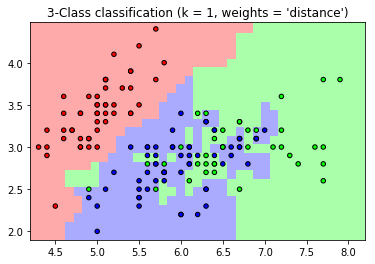

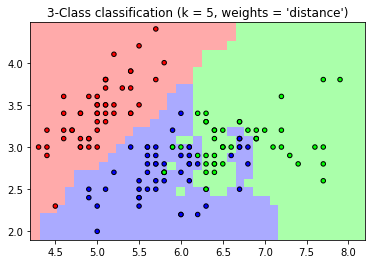

In [21]:
k=1
preds=knn_pred(input_data,train_data,train_label,k)
decision_boundary(input_data.T,preds)
k=5
preds=knn_pred(input_data,train_data,train_label,k)
decision_boundary(input_data.T,preds)